In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading The data

In [87]:
data = pd.read_csv("Salary Prediction of Data Professions.csv")
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [88]:
# Number of Rows and Coulmns in the data
data.shape

(2639, 13)

### Columns datatype

In [89]:
data.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


# 1. Exploratory Data Analysis (EDA):

In [91]:
data.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


C:\Users\El_Gohary\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


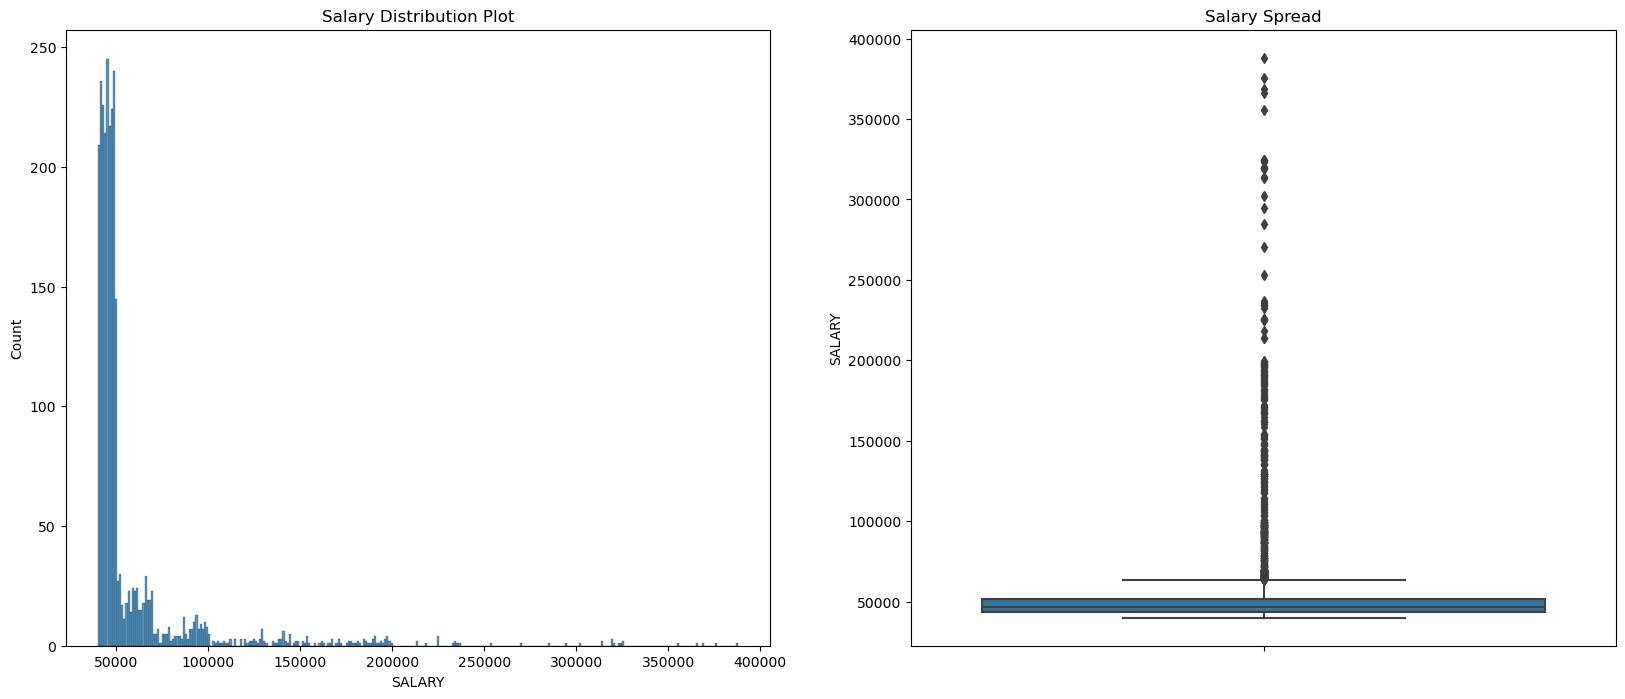

In [92]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Salary Distribution Plot')
sns.histplot(data.SALARY)

plt.subplot(1,2,2)
plt.title('Salary Spread')
sns.boxplot(y=data.SALARY)

plt.show()

## inferance
##### The plot refers that the most salary in the data are in range betweenn (40000 - 50000)

In [93]:
data.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

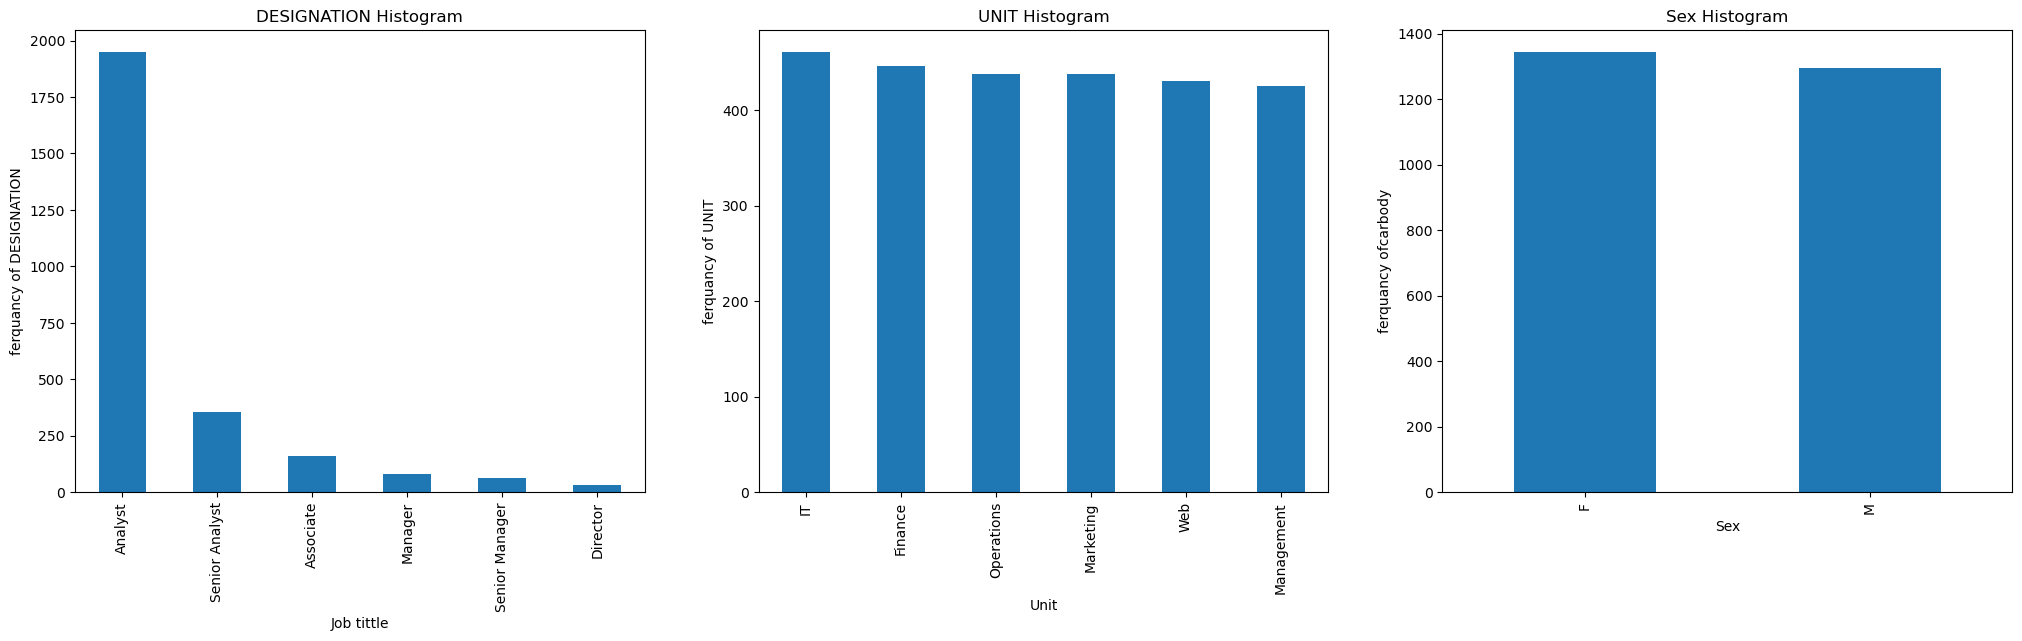

In [94]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 =data.DESIGNATION.value_counts().plot(kind='bar')
plt.title('DESIGNATION Histogram')
plt1.set(xlabel='Job tittle' , ylabel= 'ferquancy of DESIGNATION')


plt.subplot(1,3,2)
plt2 =data.UNIT.value_counts().plot(kind='bar')
plt.title('UNIT Histogram')
plt2.set(xlabel='Unit' , ylabel= 'ferquancy of UNIT')

plt.subplot(1,3,3)
plt3 =data.SEX.value_counts().plot(kind='bar')
plt.title('Sex Histogram')
plt3.set(xlabel='Sex' , ylabel= 'ferquancy ofcarbody')

plt.show()

### inferance
###### 1- most of jobs is analyist
###### 2- There is no gap in units --> same number of prople almost
###### 3 - The number of Male and Female is almost the same

In [95]:
## show Relation between the DESIGNATION and the Salary

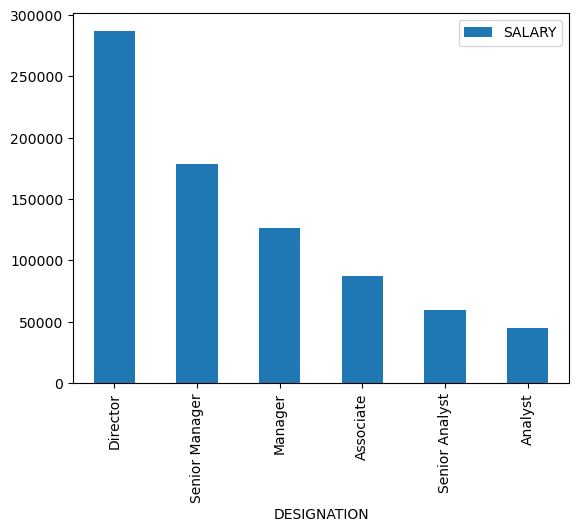

In [96]:
df = pd.DataFrame( data.groupby(['DESIGNATION'])['SALARY'].mean().sort_values(ascending = False) )
df.plot.bar()
plt.show()

### inferance
###### 1- The Highest Salary is Dirctors howver they are the less people
###### 2- The Lowest Salary is Analyst howver they are the more people

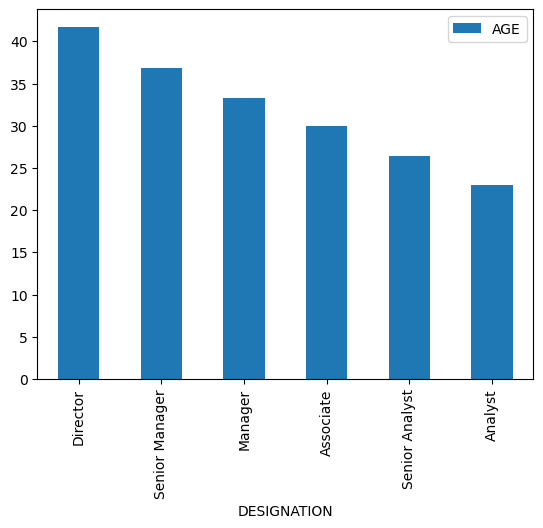

In [97]:
df = pd.DataFrame( data.groupby(['DESIGNATION'])['AGE'].mean().sort_values(ascending = False) )
df.plot.bar()
plt.show()

### inferance
###### 1- The Directors's age is the highest age in all empolyees


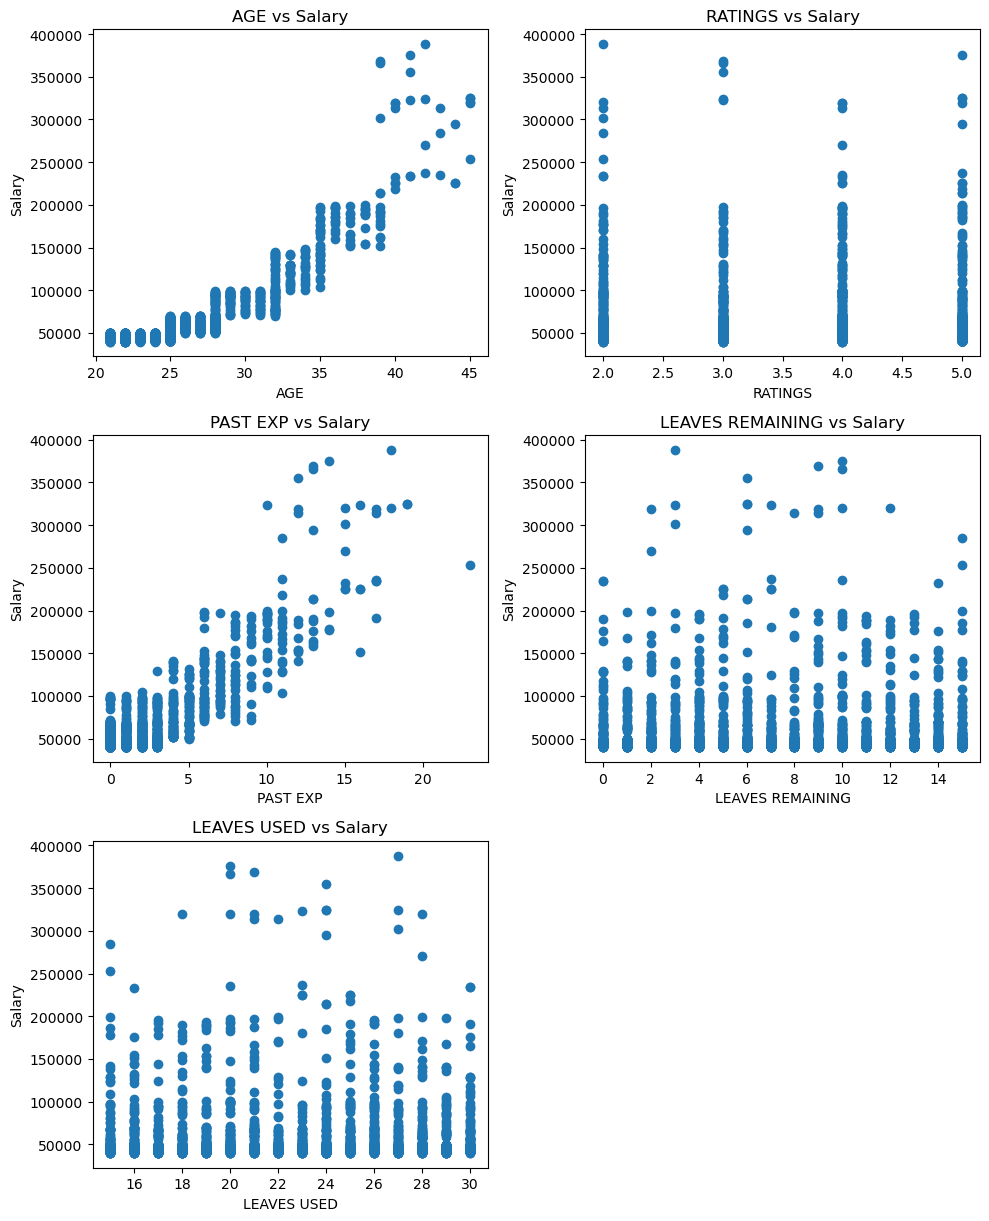

In [98]:
def scatter(x, fig ):
    plt.subplot(5,2,fig)
    plt.s(data[x],data.SALARY)
    plt.title(x+" vs Salary")
    plt.xlabel(x)
    plt.ylabel("Salary")
plt.figure(figsize=(10,20))
scatter('AGE', 1 )
scatter('RATINGS', 2 )
scatter('PAST EXP', 3 )
scatter('LEAVES REMAINING', 4 )
scatter('LEAVES USED', 5 )
plt.tight_layout()

### inferance
###### 1- There is a Posative Correlation between AGE and Salary
###### 2- There is a Posative Correlation between PAST EXP and Salary
###### 3 - There is a No Correlation between RATINGS and Salary
###### 3 - There is a No Correlation between LEAVES REMAINING and Salary

# 2- Feature Engineering

In [99]:
# compine the frist name and the last name in one coulmn
data['Full_Name'] = data['FIRST NAME'] + ' ' + data['LAST NAME']
print(data.shape)
data.head()

(2639, 14)


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Full_Name
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,TOMASA ARMEN
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,OLIVE ANCY
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,CHERRY AQUILAR
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,LEON ABOULAHOUD


# 3- Data preprocessing

### Droping duplication from data

In [100]:
print(data[data.duplicated].shape)
data = data.drop_duplicates(keep='first')
print(data[data.duplicated].shape)

(161, 14)
(0, 14)


#### inferance :
##### There is 161 Rows are duplicated so we have to drop them

 ### Droping un important coulmns That does not effect on the procces

In [101]:
# creting new_data --> without un important feature
new_data = data.drop(columns=['FIRST NAME', 'LAST NAME','Full_Name','DOJ','CURRENT DATE'])

In [102]:
new_data.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


#### Cheacking null values in each coulmns

In [103]:
new_data.isnull().sum()

SEX                 0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

#### Filling null values with the mean vlaue 

In [104]:
# Fill null values with the mean of the column
new_data['AGE'] = new_data['AGE'].fillna(new_data['AGE'].mean())
new_data['LEAVES USED'] = new_data['LEAVES USED'].fillna(new_data['LEAVES USED'].mean())
new_data['LEAVES REMAINING'] = new_data['LEAVES REMAINING'].fillna(new_data['LEAVES REMAINING'].mean())
new_data['RATINGS'] = new_data['RATINGS'].fillna(new_data['RATINGS'].mean())

In [105]:
new_data.isnull().sum()

SEX                 0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [106]:
new_data.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,Analyst,21.000000,44570,Finance,24.000000,6.0,2.000000,0
1,F,Associate,24.727273,89207,Web,22.493737,13.0,3.481826,7
2,F,Analyst,21.000000,40955,Finance,23.000000,7.0,3.000000,0
3,F,Analyst,22.000000,45550,IT,22.000000,8.0,3.000000,0
4,M,Analyst,24.727273,43161,Operations,27.000000,3.0,3.481826,3


#### Dealing with object data
###### Encode them using label encoder

In [107]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

new_data['SEX_Encoded'] = label_encoder.fit_transform(new_data['SEX'])
new_data['DESIGNATION_Encoded'] = label_encoder.fit_transform(new_data['DESIGNATION'])
new_data['UNIT_Encoded'] = label_encoder.fit_transform(new_data['UNIT'])

In [108]:
new_data.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SEX_Encoded,DESIGNATION_Encoded,UNIT_Encoded
0,F,Analyst,21.000000,44570,Finance,24.000000,6.0,2.000000,0,0,0,0
1,F,Associate,24.727273,89207,Web,22.493737,13.0,3.481826,7,0,1,5
2,F,Analyst,21.000000,40955,Finance,23.000000,7.0,3.000000,0,0,0,0
3,F,Analyst,22.000000,45550,IT,22.000000,8.0,3.000000,0,0,0,1
4,M,Analyst,24.727273,43161,Operations,27.000000,3.0,3.481826,3,1,0,4


In [109]:
new_data.drop(['SEX'], axis = 1, inplace = True)
new_data.drop(['DESIGNATION'], axis = 1, inplace = True)
new_data.drop(['UNIT'], axis = 1, inplace = True)

In [110]:
new_data.head()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SEX_Encoded,DESIGNATION_Encoded,UNIT_Encoded
0,21.000000,44570,24.000000,6.0,2.000000,0,0,0,0
1,24.727273,89207,22.493737,13.0,3.481826,7,0,1,5
2,21.000000,40955,23.000000,7.0,3.000000,0,0,0,0
3,22.000000,45550,22.000000,8.0,3.000000,0,0,0,1
4,24.727273,43161,27.000000,3.0,3.481826,3,1,0,4


### Scaling feature using Stander scaler

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_var = ['LEAVES USED','LEAVES USED','RATINGS','PAST EXP', 'DESIGNATION_Encoded','UNIT_Encoded']
new_data[num_var]= scaler.fit_transform(new_data[num_var])

In [112]:
new_data.head()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SEX_Encoded,DESIGNATION_Encoded,UNIT_Encoded
0,21.000000,44570,0.600000,6.0,0.000000,0.000000,0,0.0,0.0
1,24.727273,89207,0.499582,13.0,0.493942,0.304348,0,0.2,1.0
2,21.000000,40955,0.533333,7.0,0.333333,0.000000,0,0.0,0.0
3,22.000000,45550,0.466667,8.0,0.333333,0.000000,0,0.0,0.2
4,24.727273,43161,0.800000,3.0,0.493942,0.130435,1,0.0,0.8


## 4. Machine Learning Model Development:

In [113]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train , df_test = train_test_split(new_data,train_size=0.7 , test_size=0.3 , random_state=100)

In [114]:
y_train = df_train.pop('SALARY')
X_train = df_train

In [115]:
# Recursive Feature elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import  accuracy_score

In [116]:
lm = GradientBoostingRegressor()
lm.fit(X_train,y_train)

GradientBoostingRegressor()

In [117]:
y_test = df_test.pop('SALARY')
X_test = df_test

In [118]:
lm = GradientBoostingRegressor()
lm.fit(X_test,y_test)

GradientBoostingRegressor()

### GradientBoostingRegressor :
#### is the best model for this data

In [119]:
lm.score(X_train,y_train)

0.9338528587812238

In [120]:
print(lm.score(X_test,y_test))

0.9895839806428903


In [121]:
# Making predictions
y_pred = lm.predict(X_test)

## 5. Model Evaluation:

In [122]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.9895839806428903

In [123]:
new_data.head()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SEX_Encoded,DESIGNATION_Encoded,UNIT_Encoded
0,21.000000,44570,0.600000,6.0,0.000000,0.000000,0,0.0,0.0
1,24.727273,89207,0.499582,13.0,0.493942,0.304348,0,0.2,1.0
2,21.000000,40955,0.533333,7.0,0.333333,0.000000,0,0.0,0.0
3,22.000000,45550,0.466667,8.0,0.333333,0.000000,0,0.0,0.2
4,24.727273,43161,0.800000,3.0,0.493942,0.130435,1,0.0,0.8


## 6. ML Pipelines and Model Deployment:

In [124]:
#Save the model 
import pickle
pickle.dump(lm, open('model.pkl', 'wb'))

In [139]:
#Load the model
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[24 , 24 , 6, 0 ,0 ,1, 0, 0]]))

[44446.30318591]


C:\Users\El_Gohary\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## 7. Recommendations:

### 1- The most commen job is analyist so try to start as analyist
### 2 - he Highest Salary is Dirctors so you have to work more hard to achieve this posation
### 3- Try to take Experience i field becuse The more Experience you have the highest salary you achieve